In [3]:
using DifferentialEquations, Statistics, Plots, LaTeXStrings, Revise
gr(grid=false,legend=false,size=(400,200),titlefontsize=12)

Plots.GRBackend()

In [4]:
γ = 0.1
β = 2.1
u0= 0.0
A(u,p,t) = -γ*u # drift
B(u,p,t) = β    # diffusion

t0 = 0.0; tf = 1.0; Nt = 200
dt = .0001
tspan = (t0,tf)
t = LinRange(tspan...,Nt)
prob = SDEProblem(A,B,u0,tspan)

SDEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.0

simplest Ito method: Euler-Maruyama method

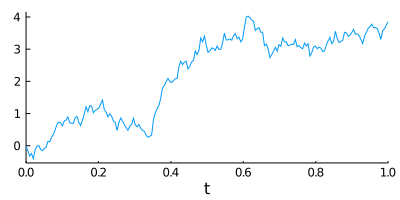

In [5]:
sol = solve(prob,EM(),dt=dt,saveat=t)
plot(sol,lw=1)

 Stratonivich method: Euler-Heun method

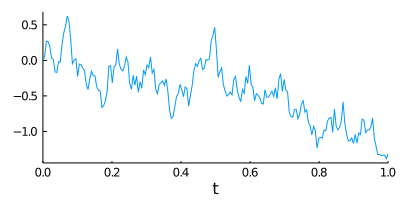

In [6]:
sol = solve(prob,EulerHeun(),dt=dt,saveat=t)
plot(sol,lw=1)

 Lamba and Rackauckas.

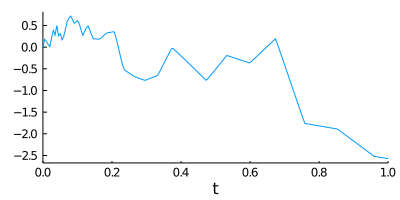

In [15]:
sol = solve(prob,LambaEM(),saveat=t)
plot(sol,lw=1)

adaptive solvers->dynamical timescales.

# Monte Carlo prob

In [8]:
monte_prob = MonteCarloProblem(prob) # adaptive, as that was last definition of prob


EnsembleProblem with problem SDEProblem

In [16]:
sol = solve(monte_prob,trajectories=1000)


EnsembleSolution Solution of length 1000 with uType:
RODESolution{Float64,1,Array{Float64,1},Nothing,Nothing,Array{Float64,1},NoiseProcess{Float64,1,Float64,Float64,Float64,Array{Float64,1},typeof(DiffEqNoiseProcess.WHITE_NOISE_DIST),typeof(DiffEqNoiseProcess.WHITE_NOISE_BRIDGE),false,ResettableStacks.ResettableStack{Tuple{Float64,Float64,Float64},false},ResettableStacks.ResettableStack{Tuple{Float64,Float64,Float64},false},RSWM{Float64},Nothing,RandomNumbers.Xorshifts.Xoroshiro128Plus},SDEProblem{Float64,Tuple{Float64,Float64},false,DiffEqBase.NullParameters,Nothing,SDEFunction{false,typeof(A),typeof(B),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},typeof(B),Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},Nothing},SOSRI,StochasticDiffEq.LinearInterpolationData{Array{Float64,1},Array{Float64,1}},DiffEqBase.DEStats}

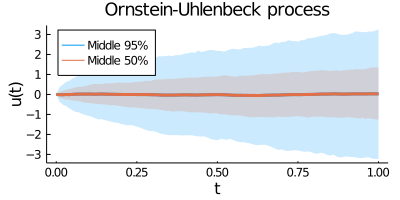

In [17]:
summ = MonteCarloSummary(sol,0:0.01:1)
plot(summ,labels="Middle 95%")
summ = MonteCarloSummary(sol,0:0.01:1;quantiles=[0.25,0.75])
plot!(summ,labels="Middle 50%",legend=:topleft)
xlabel!("t");ylabel!("u(t)")
title!("Ornstein-Uhlenbeck process")

In [18]:
a = @ode_def_bare Drift begin
  du = -γ*u    
end γ β


(::Drift{var"###ParameterizedDiffEqFunction#272",Nothing,Nothing,Nothing,Nothing,ODESystem}) (generic function with 1 method)

In [19]:
b = @ode_def_bare Diffusion begin
  du = β
end γ β

(::Diffusion{var"###ParameterizedDiffEqFunction#286",Nothing,Nothing,Nothing,Nothing,ODESystem}) (generic function with 1 method)

In [20]:
function brownian(Ntraj)
# time 
ti = 0.
tf = 100.
Nt = 100
tspan = (ti,tf)
t = LinRange(ti,tf,Nt)
γ = 0.1; β = 0.5
p = (γ,β)
    
# initial condition
u0 = [6.0]
    
# define problem
prob = SDEProblem(a,b,u0,tspan,p)
    
alg = SRIW1() # higher order adaptive for diagonal noise
dt = 1/100
    
monte_prob = MonteCarloProblem(prob)


return solve(monte_prob,alg,saveat=t,trajectories=Ntraj)
end

brownian (generic function with 1 method)

In [21]:
println("compile...")
brownian(1);

compile...


In [22]:
Ntraj = 100
println("start...")
@time sol = brownian(Ntraj);

start...
  0.016699 seconds (116.39 k allocations: 17.152 MiB)


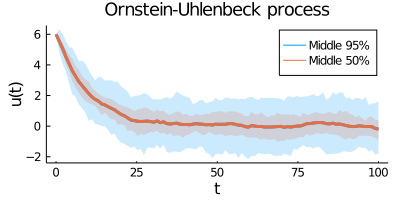

In [23]:
summ = MonteCarloSummary(sol)
plot(summ,labels="Middle 95%")
summ = MonteCarloSummary(sol;quantiles=[0.25,0.75])
plot!(summ,labels="Middle 50%",legend=:topright)
xlabel!("t");ylabel!("u(t)")
title!("Ornstein-Uhlenbeck process")

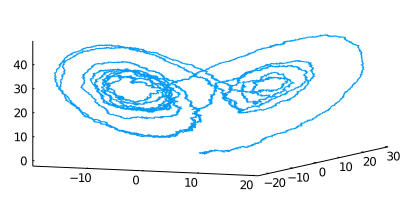

In [24]:
function lorenz(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

function σ_lorenz(du,u,p,t)
 du[1] = 3.0
 du[2] = 3.0
 du[3] = 3.0
end

prob_sde_lorenz = SDEProblem(lorenz,σ_lorenz,[1.0,0.0,0.0],(0.0,10.0))
sol = solve(prob_sde_lorenz)
plot(sol,vars=(1,2,3))